# Matplotlib

Kevin J. Walchko, created 12 Aug 2017

---

Matplotlib is a plotting library modelled after Matlab's plotting commands. We will use `matplotlib` to produce some graphs, but really use it heavily when we get to image processing. Again, we will delay the image specific functions until we get to that point. Here we are just going to learn the basics.

## Objectives

- Understand how to use matplotlib
- Understand how to plot engineering data in a Jupyter notebook

## References

- [matplotlib examples](https://matplotlib.org/users/pyplot_tutorial.html)
- [matplotlib summary](https://matplotlib.org/api/pyplot_summary.html)
- [matplotlib gallery of plots](https://matplotlib.org/gallery.html)
- [LaTEX math symbols](http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html)

## Setup

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt

# Plotting Things

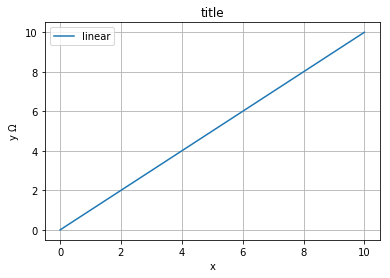

In [6]:
# Prepare the data
x = np.linspace(0, 10, 100)

# Plot the data
plt.plot(x, x, label='linear')

# make it look nice
plt.grid(True)
plt.legend()
plt.title('title')
plt.ylabel('y $\Omega$')  # you can also include latex math symbols
plt.xlabel('x');  # note, if you don't put the ';' at the end, it prints 
                  # the object address. Not an issue, but it annoys me

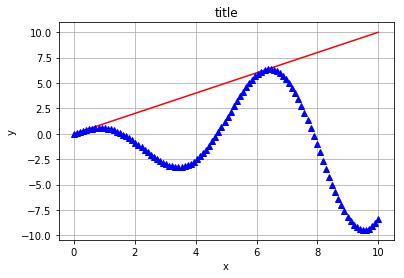

In [9]:
from math import cos

# Prepare the data
x = np.linspace(0, 10, 100)  # linspace(start, stop, how_many)
y = [n*cos(n) for n in x]

# similar to matlab
plt.plot(x, x, 'r-', x, y, 'b^')

# make it look nice
plt.grid(True)
plt.title('title')
plt.ylabel('y')
plt.xlabel('x');

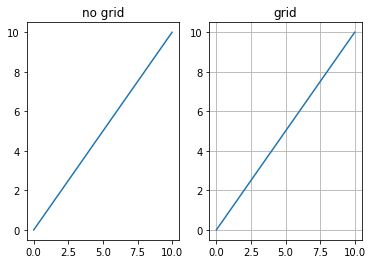

In [10]:
plt.subplot(1,2,1)
plt.plot(x, x, label='linear')
plt.title('no grid')

plt.subplot(1,2,2)
plt.plot(x, x, label='linear')
plt.title('grid');
plt.grid(True)

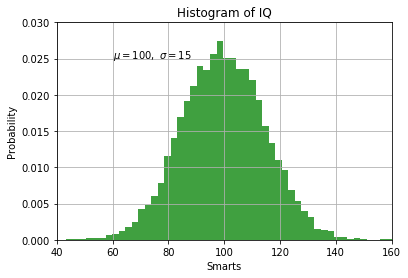

In [11]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75);
plt.grid(True)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') # put text at (x,y)=(60,0.025)
plt.axis([40, 160, 0, 0.03]);


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.